In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.utils.data as Data
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda NVIDIA GeForce RTX 3060


### Read data files and build array

In [3]:
fname = "body_acc_z_train.xlsx"  #the data file is located at the same directory
df=pd.read_excel(fname, header=None)

In [4]:
#convert data to numpy array
numpyX = np.array(df.values)
print(numpyX.shape)

(7352, 128)


### Define Auto-encoder

Reference: https://github.com/L1aoXingyu/pytorch-beginner/tree/master/08-AutoEncoder

In [5]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(   
            nn.Linear(128, 128),
            nn.Tanh(),
            nn.Linear(128, 64),                
            nn.Tanh(),
            nn.Linear(64, 64), 
            nn.Tanh(),
            nn.Linear(64, 32), 
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.Tanh(),
            nn.Linear(64, 64),                
            nn.Tanh(),
            nn.Linear(64, 128), 
            nn.Tanh(),
            nn.Linear(128, 128), 
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
model = autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

### Train NN

In [7]:
num_epochs = 30
BATCH_SIZE = 4096

In [11]:
train_lossLst = []
validation_lossLst = []

# split training data to train and validation
trainX, validationX = train_test_split(numpyX, test_size=0.20, random_state=0)
tensor_trainX = torch.FloatTensor(trainX).to(device)
tensor_validationX = torch.FloatTensor(validationX).to(device)

torch_dataset = Data.TensorDataset(tensor_trainX)
loader = Data.DataLoader(
    dataset=torch_dataset,  
    batch_size=BATCH_SIZE,      
    shuffle=True,       
    num_workers=0,   
)

for epoch in range(num_epochs):
    if(epoch%100 == 0):
      print(epoch, end=",")
    model.train().to(device)
    train_loss = 0
    epoch_lossLst=[]
    for batchX, in loader:
        batchX = batchX.to(device)
        output = model(batchX)
        loss = criterion(output, batchX)
        epoch_lossLst.append(float(loss))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg = sum(epoch_lossLst)/len(epoch_lossLst)
    train_lossLst.append(avg) 

    tensor_validationX_hat = model(tensor_validationX)
    validatiion_loss = criterion(tensor_validationX_hat, tensor_validationX)
    validation_lossLst.append(float(validatiion_loss))

0,

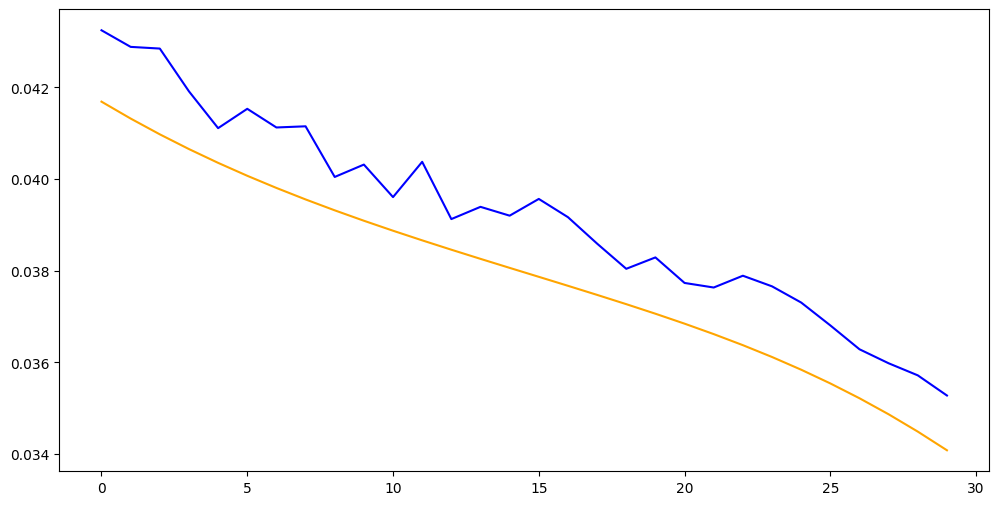

In [12]:
fig=plt.figure(figsize=(12, 6))
plt.plot(train_lossLst, color='blue')
plt.plot(validation_lossLst, color='orange')
plt.show()

### Visualize input and output generated by AE

In [13]:
for batchX, in dataloader:
    break

In [14]:
batchX.shape

torch.Size([512, 128])

In [15]:
output = model(batchX.to(device))

In [16]:
output.shape

torch.Size([512, 128])

In [18]:
output = output.cpu().detach().numpy()

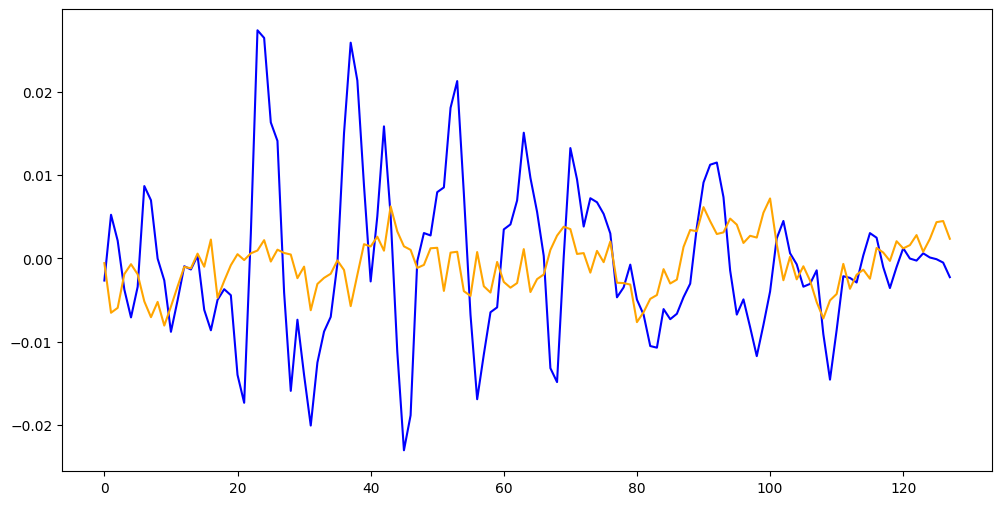

In [19]:
idx = 10  #a number between 0 and batch size-1
fig = plt.figure(figsize=(12, 6))
plt.plot(batchX[0], color='blue')
plt.plot(output[0], color='orange')
plt.show()

### Visualize input and output generated by AE using test data

In [20]:
fname = "body_acc_z_test.xlsx"  #the data file is located at the same directory
df=pd.read_excel(fname, header=None)

In [21]:
numpyX = np.array(df.values)
tensorX = torch.FloatTensor(numpyX)
dataset = Data.TensorDataset(tensorX)

In [22]:
dataloader = Data.DataLoader(
    dataset= dataset,     
    batch_size= 6,       
    shuffle=True,              
    num_workers=2,             
)

In [23]:
for batchX, in dataloader:
    break

In [24]:
batchX.shape

torch.Size([6, 128])

In [25]:
output = model(batchX.to(device))

In [26]:
output = output.cpu().detach().numpy()

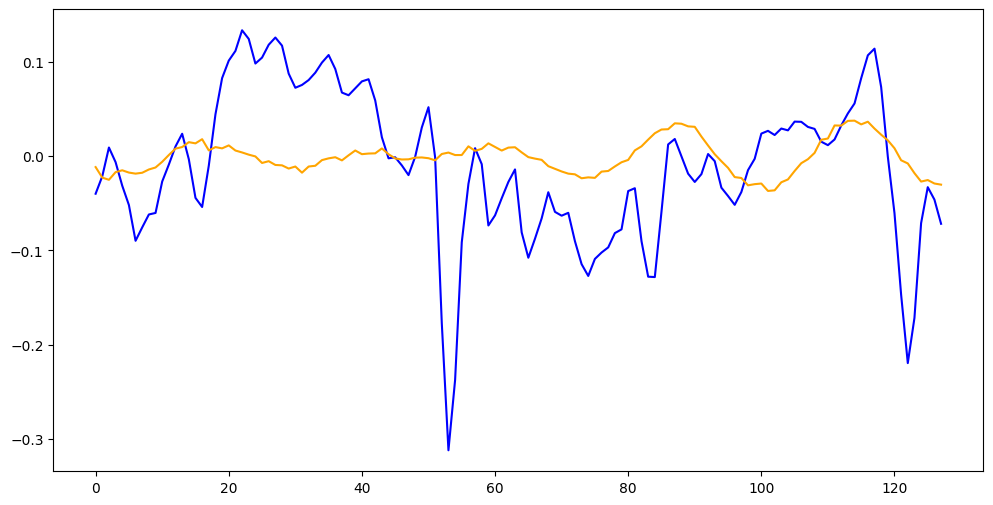

In [27]:
fig = plt.figure(figsize=(12, 6))
plt.plot(batchX[0], color='blue')
plt.plot(output[0], color='orange')
plt.show()